## **Week 3 Applied Session: Regular Expression**

In the lecture, you have learnt how to use regular expressions. To quickly review some regular expression syntax:


* <font color="red">[0-9]</font> Matches a single digit
* <font color="red">[a-z0-9]</font> Matches a single character that must be a lower case letter or a digit.
* <font color="red">[A-Za-z]</font> Matches a single character that much be a upper/lower case letter
* <font color="red">\d</font> Matches any decimal digit; equivalent to the set [0-9].
* <font color="red">\D</font> Matches characters that are not digits, which is equivalent to [^0-9] or [^\d].
* <font color="red">\w</font> Matches any alphanumeric character, which is equivalent to [a-zA-Z0-9].
* <font color="red">\W</font> Matches any non-alphanumeric character; which is equivalent to [^a-zA-Z0-9] or [^\w].
* <font color="red">\s</font> Matches any whitespace character; which is equivalent to [\t\n\r\f\v], where \t indicates taps, \n  line feeds, \r carriage returns, \f form feeds and \v vertical tabs.
* <font color="red">\S:</font> Matches any non-whitespace character; which is equivalent to  [^ \t\n\r\f\v].
* <font color="red">ˆ</font> Matches the start of the line.
* <font color="red">$</font> Matches the end of the line.
* <font color="red">.</font> Matches any character (a wildcard).
* <font color="red">*</font> Matches when the preceding character occurs zero or more times
* <font color="red">?</font> Matches when the preceding character occurs zero or one times
* <font color="red">+</font> Matches when the preceding character occurs one or more times

More information can be found here :
https://docs.python.org/3/library/re.html
* * *

Let's get ready!!!

In [31]:
# If you are using Google Colab, you can mount your Google Drive to access your files.
# If you are using a local environment, you can skip this step.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import sys
print (sys.version_info)

sys.version_info(major=3, minor=13, micro=1, releaselevel='final', serial=0)


Libraries needed are:

In [2]:
import re # library for regular expression
import pandas as pd
pd.__version__

'2.3.1'

### **1. Backslash**

**What is `\`?**

`\`, backslash or escape-character, is used to indicate special forms or to allow special characters to be used without invoking their special meaning.



**How about `r""` ? When to use it?**

`""` is Python's string literal prefix notation, which has nothing to do with regular expression.  By using `r""` or `r''`, Python will not handle special characters in any special way, in another word, it treated the contents as raw string. For example, `"\t"` represents
a two-character string containing `'\'` and `'t'`, whereas `"\t"` represents tab.

Sometimes you can use them interchangeably,

In [3]:
str1 = re.findall('\\t', "Please find \t")
print (str1)

str2 = re.findall(r'\\t', "Please find \\t")
print (str2)

['\t']
['\\t']


In [6]:
str1 = re.findall('\\w', "Please find \w")
print (str1)

str2 = re.findall(r'\\w', "Please find \\w")
print (str2)

['P', 'l', 'e', 'a', 's', 'e', 'f', 'i', 'n', 'd', 'w']
['\\w']


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\adria\AppData\Local\Temp\ipykernel_7772\2355781494.py:1: SyntaxWarning: invalid escape sequence '\w'
  str1 = re.findall('\\w', "Please find \w")


In [7]:
str1 = "Please find 	" # a real tab space is here
pattern = "	" # a real tab space is here
result = re.findall(pattern, str1)
print(result)
result = re.findall(' ', "Pleasefind  ")
print(result)

['\t']
[' ', ' ']


In [8]:
print('\\\\t') # I think i know why \\\t is giving \ it is reading from left to right so \\ then \t which is tab! yay!

\\t


Sometimes not!

In [9]:
str3 = re.findall('\\\t', "Please find \t")
print (str3)
print('\\t')
print("Please find \\t")

['\t']
\t
Please find \t


In [57]:
r'\t'
print('\\\t')

\	


In [7]:
s = 't\\t\tt'
print(s)  # howwww whyyyy .......... tell me why ain't nothing but a heartache!

t\t	t


[tell me why](https://www.youtube.com/shorts/eOXytEU5nAU)

In [51]:
str1=re.match(r"\W(.)\1\W", " ff ")
print (str1)

str2=re.match("\W(.)\1\W", " ff ")
print (str2)

str3=re.match("\\W(.)\\1\\W", " ff ")
print (str3)

<re.Match object; span=(0, 4), match=' ff '>
None
<re.Match object; span=(0, 4), match=' ff '>


`"\W(.)\1\W"` doesn't match? What is the difference?

In [52]:
str4="\W(.)\1\W"
print (str4) # \1 in a normal Python string means the single non-printable control character with octal value 1 (decimal 1, hex 0x01).
str4

\W(.)\W


'\\W(.)\x01\\W'

In [61]:
repr(r"\W(.)\1\W")

"'\\\\W(.)\\\\1\\\\W'"

In [ ]:
str4=r"\W(.)\1\W"
print (str4)
str4

Now you might be able to guess, what `"\W(.)\1\W"` will match.

In [ ]:
str2=re.match("\W(.)\1\W", " f\x01 ")
print (str2)

It matches with non-word + any one character  + "\x01" + non-word.

#####  **repr()** Great \for debugging regex patterns to see what the regex engine actually ***receives*** after Python parses your string literal. print() shows the characters; repr() shows a Python-escaped version

In [76]:
s_norm = "\n\tA\\B"     # newline, tab, then A\B
s_raw  = r"\n\tA\B"     # backslash-n, backslash-t, A\B (no escapes)

print(s_norm)           # prints on two lines with a tab:  (newline)(tab)A\B
print(repr(s_norm))     # '...\n\tA\\B'  ← source literal with escapes shown

print(s_raw)            # \n\tA\B
print(repr(s_raw))      # '\\n\\tA\\B'   ← raw kept the backslashes




	A\B
'\n\tA\\B'
\n\tA\B
'\\n\\tA\\B'


**Note**: always fist validate your regular expression, then test with Python

\* is ??  <br>
\* is a wildcard similar with ? and +  <br>
\* matches 0+ <br>
? matches 0-1 <br>
\+ matches 1+ <br>

In [62]:
str1 = re.findall(r'.*', 'Please find all.')
print (str1)

['Please find all.', '']


In [63]:
str1 = re.findall(r'.?', 'Please find all.')
print (str1)

['P', 'l', 'e', 'a', 's', 'e', ' ', 'f', 'i', 'n', 'd', ' ', 'a', 'l', 'l', '.', '']


In [64]:
str1 = re.findall(r'.+', 'Please find all.')
print (str1)

['Please find all.']


In [67]:
str1 = re.findall(r'l+', 'Please find all')
print (str1)

['l', 'll']


#### Greedy vs lazy quantifiers

In [10]:
s = "<tag>one</tag><tag>two</tag>"

# Greedy: eats from the first <tag> to the last </tag>
print(re.search(r"<tag>.*</tag>", s).group(0))
# -> "<tag>one</tag><tag>two</tag>"

# Lazy: stops at the first possible </tag>; findall gets both
print(re.findall(r"<tag>.*?</tag>", s))
# -> ['<tag>one</tag>', '<tag>two</tag>']

s = '"foo" and "bar"'

# Greedy: one big match
print(re.findall(r'".*"', s))
# -> ['"foo" and "bar"']

# Lazy: individual quoted chunks
print(re.findall(r'".*?"', s))
# -> ['"foo"', '"bar"']
s = "aaaaa"

# Greedy: take as many as allowed (up to 5)
print(re.search(r"a{2,5}", s).group(0))
# -> "aaaaa"

# Lazy: take as few as allowed (down to 2)
print(re.search(r"a{2,5}?", s).group(0))
# -> "aa"


s = "aaaa"

# Greedy first group; it backtracks just enough for group 2
m = re.search(r"(a+)(a+)", s)
print(m.groups())
# -> ('aaa', 'a')

# Lazy first group; it gives up as little as possible
m = re.search(r"(a+?)(a+)", s)
print(m.groups())
# -> ('a', 'aaa')

<tag>one</tag><tag>two</tag>
['<tag>one</tag>', '<tag>two</tag>']
['"foo" and "bar"']
['"foo"', '"bar"']
aaaaa
aa
('aaa', 'a')
('a', 'aaa')


In [5]:
s = r"\section"

# raw string for the pattern
print(bool(re.search(r"\\section", s)) )    # True

# normal string, doubled again for Python
print(bool(re.search("\\\\section", s))   ) # True

# wrong: \s means “whitespace” in regex, not a literal backslash
print(bool(re.search(r"\section", s))   )   # False (it tries to match whitespace + 'ection')


True
True
False


In [23]:
import re

print("=== MATCHING LITERAL BACKSLASH \\")
print()

# Test text with backslashes
text1 = r"C:\Users\Documents\file.txt"
text2 = "Math: 2\\3 = fraction"

# Pattern to match literal backslash
pattern_backslash = r'\\'

print(f"Text: {text1}")
print(f"Pattern: {pattern_backslash}")
print(f"Matches: {re.findall(pattern_backslash, text1)}") # python will add \ extra for display
print()

print(f"Text: {text2}")
print(f"Matches: {re.findall(pattern_backslash, text2)}")
print()

# Showing the difference - this would match actual tab character
literal_backslash_t = r'\\t'
tab_char_pattern = r'\t'
text3 = "tab\there vs backslash\\t"
print(f"Text: {text3}")
print(f"Pattern for literal \\t: {re.findall(literal_backslash_t, text3)}")
print(f"Pattern for tab char: {re.findall(tab_char_pattern, text3)}")
print()

print("=== MATCHING LITERAL CARET ^")
print()

# Test text with carets
text4 = "^Start with caret"
text5 = "Math: 2^3 = 8"
text6 = "Symbols: ^, &, #"

# At start of pattern - needs escaping
pattern_caret_start = r'\^'
print(f"Text: {text4}")
print(f"Pattern: {pattern_caret_start}")
print(f"Matches: {re.findall(pattern_caret_start, text4)}")
print()

# Not at start - escaping optional
pattern_caret_middle1 = r'2^3'
pattern_caret_middle2 = r'2\^3'
print(f"Text: {text5}")
print(f"Pattern '2^3': {re.findall(pattern_caret_middle1, text5)}")
print(f"Pattern '2\\^3': {re.findall(pattern_caret_middle2, text5)}")
print()

# In character class
pattern_caret_class1 = r'[^,&#]'  # This means NOT comma, ampersand, hash
pattern_caret_class2 = r'[\^,&#]' # This means caret OR comma OR ampersand OR hash
print(f"Text: {text6}")
print(f"Pattern '[^,&#]' (NOT these chars): {re.findall(pattern_caret_class1, text6)}")
print(f"Pattern '[\\^,&#]' (literal ^,&,#): {re.findall(pattern_caret_class2, text6)}")
print()

print("=== COMBINATION EXAMPLES")
print()

# Text with both backslashes and carets
text7 = "Path: C:\\Users^ and formula: 2^3\\2"

# Match both backslashes and carets
pattern_both = r'[\\^]'
print(f"Text: {text7}")
print(f"Pattern '[\\\\^]' (backslash OR caret): {re.findall(pattern_both, text7)}")

# Match specific sequences
pattern_sequence = r'\\\w+\^'  # backslash + word chars + caret
print(f"Pattern '\\\\\\w+\\^' (\\word^): {re.findall(pattern_sequence, text7)}")

=== MATCHING LITERAL BACKSLASH \

Text: C:\Users\Documents\file.txt
Pattern: \\
Matches: ['\\', '\\', '\\']

Text: Math: 2\3 = fraction
Matches: ['\\']

Text: tab	here vs backslash\t
Pattern for literal \t: ['\\t']
Pattern for tab char: ['\t']

=== MATCHING LITERAL CARET ^

Text: ^Start with caret
Pattern: \^
Matches: ['^']

Text: Math: 2^3 = 8
Pattern '2^3': []
Pattern '2\^3': ['2^3']

Text: Symbols: ^, &, #
Pattern '[^,&#]' (NOT these chars): ['S', 'y', 'm', 'b', 'o', 'l', 's', ':', ' ', '^', ' ', ' ']
Pattern '[\^,&#]' (literal ^,&,#): ['^', ',', '&', ',', '#']

=== COMBINATION EXAMPLES

Text: Path: C:\Users^ and formula: 2^3\2
Pattern '[\\^]' (backslash OR caret): ['\\', '^', '^', '\\']
Pattern '\\\w+\^' (\word^): ['\\Users^']


### POC (point of the code): You want to understand which tab was mached. So you extract the words around it i.e. the context around to understand just that.

In [29]:
import re

# Showing the difference - this would match actual tab character
literal_backslash_t = r'\\t'
tab_char_pattern = r'\t'
text3 = "tab\there vs backslash\\t"

print(f"Text: {text3}")
print(f"Pattern for literal \\t: {re.findall(literal_backslash_t, text3)}")
print(f"Pattern for tab char: {re.findall(tab_char_pattern, text3)}")
print()

print("=== WITH CONTEXT ===")

# Find literal \t with context
print("Literal \\t matches with context:")
for match in re.finditer(literal_backslash_t, text3):
    start, end = match.span()
    # Get 5 characters before and after for context
    context_start = max(0, start - 5)
    context_end = min(len(text3), end + 5)
    context = text3[context_start:context_end]
    print(f" Actual Text: '{text3[:start]}[{match.group()}]{text3[end:]}'") # text3[:start] - Everything before the match, [{match.group()}] - The actual match wrapped in brackets, text3[end:] - Everything after the match

    print(f"  Found '{match.group()}' at position {start}-{end}")
    print(f"  Context: '{context}'")
print()





Text: tab	here vs backslash\t
Pattern for literal \t: ['\\t']
Pattern for tab char: ['\t']

=== WITH CONTEXT ===
Literal \t matches with context:
 Actual Text: 'tab	here vs backslash[\t]'
  Found '\t' at position 21-23
  Context: 'slash\t'



## **2. Regular Expression for Dates**

Refine the regular expression for date to distinguish months with 29/30/31 days.

**Note**: assume all years are a leap year, which means every Feburary has 29 days.

In [36]:
# define a function to validate the input date
def date(pattern, m):
    if re.match(pattern, m):
        print (m + " is a date")
    else:
        print (m + " is NOT a date")

# Regex for Date Validation - POC ( point of the code)

It matches day–month–year with either / or - as separators.

## The `(?x)` flag
This enables "verbose mode" -  In this mode, spaces and newlines are ignored and # starts a comment, which is why the pattern is laid out nicely.
## Overall structure: Three conditions with alternates
1.   February (1–29)
  - ([12][0-9] | 0?[1-9]) → days 10–29 or 1–9 with an optional leading zero.
  - [/-] → either / or - as the separator.
  - (0?2) → month 2 with an optional leading zero (2 or 02).
2.   30-day months (1–30) → Apr, Jun, Sep, Nov
  - Day 1–30 (optional leading zero).
  - Month 4, 6, 9, 11 (04/06/09 allowed; 11 has no leading zero here).
3.   31-day months (1–31) → Jan, Mar, May, Jul, Aug, Oct, Dec

4. `((?:[0-9]{2})?[0-9]{2})` - Year (2 or 4 digits)
  - optional two digits (century) + two digits → 1999, 2024, or just 99.


##### There are still problems: what about non leap years, what about mixed separators?, what about years starting with 0?

In [37]:
regex = r'''(?x)
    # just the month and date here
    (?:
    # February (29 days every year)
      ([12][0-9]|0?[1-9])[/-](0?2)
    # 30-day months
      |(30|[12][0-9]|0?[1-9])[/-](0?[469]|11)
    # 31-day months
      |(3[01]|[12][0-9]|0?[1-9])[/-](0?[13578]|1[02])
    )
    # Year
    [/-]((?:[0-9]{2})?[0-9]{2})
'''

In [38]:
#date(r"((31[/-](0?[13578]|1[02]))|(30[/-](0?[469]|11))|(28[/-]02))[/-]((?:\d{2})?\d{2})", "28/02/2019")
date(regex, "28/02/2019")
date(regex, "31/04/2019")
date(regex, "29/05/2019")
date(regex, "31/06/2019")

28/02/2019 is a date
31/04/2019 is NOT a date
29/05/2019 is a date
31/06/2019 is NOT a date


We can draw the diagram to demon the logic of this regular expression:

![](https://drive.google.com/uc?export=download&id=1Wk7voq-u0iNBZ9wF-cBAjdvLowJoRaFJ)

## **3. Extract IPs, dates, and email address with regular expressions**

With following tasks we will use the mail box data ([mbox-short.txt](http://www.pythonlearn.com/code3/mbox-short.txt)) provided by the book [Python for Informatics: Exploring Information](http://www.pythonlearn.com/book.php#python-for-informatics).

In [39]:
# Colab please use this directory: '/content/drive/Shareddrives/FIT5196_S2_2025/week3/mbox-short.txt' as input directory
# If you are using a local environment, you can download the file from your shared drive and use the file path as input directory
infile = open('/content/drive/Shareddrives/FIT5196_S2_2025/week3/mbox-short.txt','r')

text = infile.read()

In [40]:
 text[:100]

'\\t\t\t\t\nFrom stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008\nReturn-Path: <postmaster@collab.sakai'

### **3.1 Find IP addresses**

We are trying to
1. find all IP addresses in the mbox-short dataset.
2. print unique IP addresses


In [41]:
str1 = re.findall(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', "This is a IP address 111.23.39.99") # matches “three groups of 1–3 digits followed by a dot, then one final group of 1–3 digits”, i.e. a simple IPv4 shape.
str1

['111.23.39.99']

![](https://drive.google.com/uc?export=download&id=1v5Os9EzlTo1sNwbMF9MTTMOZ0NpQVe9M)
From https://regexper.com/

In [42]:
str1= re.findall(r'(?:[0-9]{1,3}\.){3}[0-9]{1,3}', text)
if len(str1)>0:
    print (str1)

['141.211.14.90', '141.211.14.79', '194.35.219.184', '127.0.0.1', '194.35.219.182', '134.68.220.122', '127.0.0.1', '8.12.11.200', '8.12.11.200', '141.211.14.97', '141.211.93.149', '194.35.219.184', '127.0.0.1', '194.35.219.182', '134.68.220.122', '127.0.0.1', '8.12.11.200', '8.12.11.200', '141.211.14.25', '141.211.93.144', '194.35.219.184', '127.0.0.1', '194.35.219.182', '134.68.220.122', '127.0.0.1', '8.12.11.200', '8.12.11.200', '141.211.14.25', '141.211.14.43', '194.35.219.184', '127.0.0.1', '194.35.219.182', '134.68.220.122', '127.0.0.1', '8.12.11.200', '8.12.11.200', '141.211.14.46', '141.211.14.83', '194.35.219.184', '127.0.0.1', '194.35.219.182', '134.68.220.122', '127.0.0.1', '8.12.11.200', '8.12.11.200', '141.211.14.93', '141.211.93.142', '194.35.219.184', '127.0.0.1', '194.35.219.182', '134.68.220.122', '127.0.0.1', '8.12.11.200', '8.12.11.200', '141.211.14.46', '141.211.14.72', '194.35.219.184', '127.0.0.1', '194.35.219.182', '134.68.220.122', '127.0.0.1', '8.12.11.200', '8.

By running the code above, we are able to print all IP addresses.

Next can we save all unique IP address in a list? We will need to read the whole txt file in to `text`, and then apply `re.findall` function. `set()` function returns the unique values.

In [43]:
str1=re.findall(r'(?:[0-9]{1,3}\.){3}[0-9]{1,3}', text)
set(str1)

{'127.0.0.1',
 '134.68.220.122',
 '141.211.14.25',
 '141.211.14.34',
 '141.211.14.36',
 '141.211.14.39',
 '141.211.14.43',
 '141.211.14.46',
 '141.211.14.58',
 '141.211.14.72',
 '141.211.14.76',
 '141.211.14.79',
 '141.211.14.83',
 '141.211.14.84',
 '141.211.14.90',
 '141.211.14.91',
 '141.211.14.92',
 '141.211.14.93',
 '141.211.14.97',
 '141.211.14.98',
 '141.211.93.141',
 '141.211.93.142',
 '141.211.93.143',
 '141.211.93.144',
 '141.211.93.145',
 '141.211.93.149',
 '141.211.93.151',
 '141.211.93.152',
 '141.211.93.153',
 '194.35.219.182',
 '194.35.219.184',
 '8.12.11.200'}

### **3.2 Extract All date time**


In the next task, we need to extract all date time from the file. We trust that all date time are valid for now.


In [44]:
str1=re.findall(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})', text)
set(str1)

{'2007-09-12 16:17:59',
 '2007-12-12 21:40:33',
 '2007-12-17 17:11:08',
 '2007-12-20 15:25:38',
 '2007-12-20 21:26:28',
 '2007-12-28 23:44:24',
 '2008-01-03 16:22:14',
 '2008-01-03 16:27:29',
 '2008-01-03 16:33:02',
 '2008-01-03 17:05:11',
 '2008-01-03 17:16:39',
 '2008-01-03 19:23:46',
 '2008-01-04 04:05:43',
 '2008-01-04 04:31:35',
 '2008-01-04 04:47:16',
 '2008-01-04 06:05:51',
 '2008-01-04 07:00:10',
 '2008-01-04 09:02:54',
 '2008-01-04 10:01:40',
 '2008-01-04 10:15:54',
 '2008-01-04 10:37:04',
 '2008-01-04 11:08:38',
 '2008-01-04 11:09:12',
 '2008-01-04 11:10:04',
 '2008-01-04 11:11:00',
 '2008-01-04 11:33:05',
 '2008-01-04 11:35:25',
 '2008-01-04 13:05:51',
 '2008-01-04 14:48:37',
 '2008-01-04 15:01:37',
 '2008-01-04 15:44:39',
 '2008-01-04 16:09:01',
 '2008-01-04 18:08:50',
 '2008-01-05 09:12:07'}

### **3.3 Extract author's email address**


There are many email addresses included in the file. We would like to extract email addresses from the Author the format is normally:

`"Author: stephen.marquard@uct.ac.za"`

Now lets see if we can use the following regular expression:

```python
r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+"
```
which was copied and pasted from http://emailregex.com/

Does it work in the task?

In [45]:
str1=re.findall(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", text)
set(str1)

{'200801032122.m03LMFo4005148@nakamura.uits.iupui.edu',
 '200801032127.m03LRUqH005177@nakamura.uits.iupui.edu',
 '200801032133.m03LX3gG005191@nakamura.uits.iupui.edu',
 '200801032205.m03M5Ea7005273@nakamura.uits.iupui.edu',
 '200801032216.m03MGhDa005292@nakamura.uits.iupui.edu',
 '200801040023.m040NpCc005473@nakamura.uits.iupui.edu',
 '200801040905.m0495rWB006420@nakamura.uits.iupui.edu',
 '200801040932.m049W2i5006493@nakamura.uits.iupui.edu',
 '200801040947.m049lUxo006517@nakamura.uits.iupui.edu',
 '200801041106.m04B6lK3006677@nakamura.uits.iupui.edu',
 '200801041200.m04C0gfK006793@nakamura.uits.iupui.edu',
 '200801041403.m04E3psW006926@nakamura.uits.iupui.edu',
 '200801041502.m04F21Jo007031@nakamura.uits.iupui.edu',
 '200801041515.m04FFv42007050@nakamura.uits.iupui.edu',
 '200801041537.m04Fb6Ci007092@nakamura.uits.iupui.edu',
 '200801041608.m04G8d7w007184@nakamura.uits.iupui.edu',
 '200801041609.m04G9EuX007197@nakamura.uits.iupui.edu',
 '200801041610.m04GA5KP007209@nakamura.uits.iupu

What if I only want email address after Author ?

In [46]:
str1=re.findall(r'Author: ([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', text)
str1

['stephen.marquard@uct.ac.za',
 'louis@media.berkeley.edu',
 'zqian@umich.edu',
 'rjlowe@iupui.edu',
 'zqian@umich.edu',
 'rjlowe@iupui.edu',
 'cwen@iupui.edu',
 'cwen@iupui.edu',
 'gsilver@umich.edu',
 'gsilver@umich.edu',
 'zqian@umich.edu',
 'gsilver@umich.edu',
 'wagnermr@iupui.edu',
 'zqian@umich.edu',
 'antranig@caret.cam.ac.uk',
 'gopal.ramasammycook@gmail.com',
 'david.horwitz@uct.ac.za',
 'david.horwitz@uct.ac.za',
 'david.horwitz@uct.ac.za',
 'david.horwitz@uct.ac.za',
 'stephen.marquard@uct.ac.za',
 'louis@media.berkeley.edu',
 'louis@media.berkeley.edu',
 'ray@media.berkeley.edu',
 'cwen@iupui.edu',
 'cwen@iupui.edu',
 'cwen@iupui.edu']

## ***Groups***  

Look at the news snippet below we are going to extract many things from this

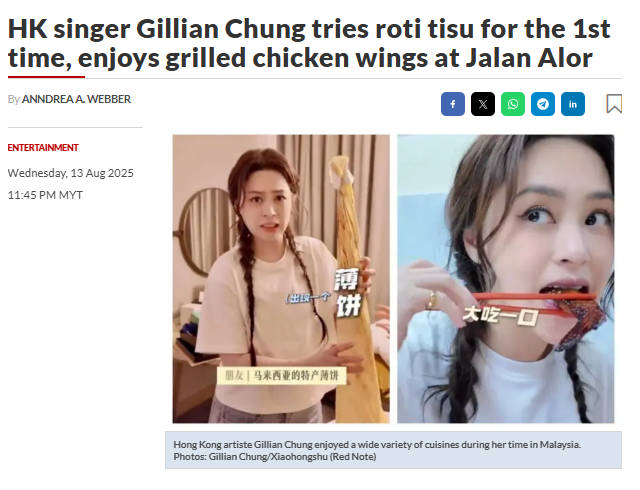

In [9]:
snippet = """Hong Kong singer Gillian Chung recently visited Malaysia as a guest on the variety show Beauty Fafa, and she made sure to enjoy her time in the country to the fullest.

In a video shared on Xiaohongshu (Red Note), the 44-year-old offered fans a peek at how she relaxed after her schedule ended.

Once filming wrapped, Chung – one-half of the Cantopop duo Twins – made her way to the lively Jalan Alor in Bukit Bintang, Kuala Lumpur, for dinner at a local Chinese restaurant.

Her spread included a variety of vegetables, grilled stingray and satay, but the star of the night for her was the street’s famous grilled chicken wings.



But her food adventure didn’t stop there.

Upon returning to her hotel room, the singer received a delightful surprise from her staff members – a towering roti tissue.

“How do you eat this?” she laughed, tearing off a small piece and taking a bite.


StarPicks
Unifi Mobile raises the bar with 5G mobile performance
“It tastes delicious!” she exclaimed before going in for a second bite.

Many netizens left comments expressing their joy at seeing Chung enjoy her food so heartily, while others praised her youthful looks, noting she looks almost unchanged from her 20s.

“I’d believe her if she said she was in her 20s,” one fan commented.

Another wrote: “She eats so well. I really enjoy watching her eat!”"""


#### Suppose you want to match city names like Jalan Alor, Bukit Bintang, Kuala Lumpur, Petaling Jaya....



1.   One capitalized word (first letter A–Z) : ***J***
2.   Then 1+ lowercase letters: ***alan***
3.   (?:\s[A-Z][a-z]+)*: zero or more repeats of space + capitalized word. This is a non-capturing group (?: … ) with * so multi-word names become a single match  : A space lor


In [17]:
pat1 = re.compile(r'([A-Z][a-z]+(\s[A-Z][a-z]+)*)')
print(" capturing groups",pat.findall("Kuala Lumpur, Bukit Bintang"))
# → [('Kuala Lumpur', ' Lumpur'), ('Bukit Bintang', ' Bintang')]
pat = re.compile(r'([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)')
print("non-capturing groups",pat.findall("Kuala Lumpur, Bukit Bintang"))
# → ['Kuala Lumpur', 'Bukit Bintang']

print(" non-capturing groups from snippet",pat1.findall(snippet))


 capturing groups ['Kuala Lumpur', 'Bukit Bintang']
non-capturing groups ['Kuala Lumpur', 'Bukit Bintang']
 non-capturing groups from snippet [('Hong Kong', ' Kong'), ('Gillian Chung', ' Chung'), ('Malaysia', ''), ('Beauty Fafa', ' Fafa'), ('In', ''), ('Xiaohongshu', ''), ('Red Note', ' Note'), ('Once', ''), ('Chung', ''), ('Cantopop', ''), ('Twins', ''), ('Jalan Alor', ' Alor'), ('Bukit Bintang', ' Bintang'), ('Kuala Lumpur', ' Lumpur'), ('Chinese', ''), ('Her', ''), ('But', ''), ('Upon', ''), ('How', ''), ('Star', ''), ('Picks\nUnifi Mobile', ' Mobile'), ('It', ''), ('Many', ''), ('Chung', ''), ('Another', ''), ('She', '')]


In [21]:
# two words no spaces
pat2 = re.compile(r'([A-Z][a-z]+(\s[A-Z][a-z]+)+)') # replace star with +
print("non-capturing groups",pat2.findall(snippet))
pat3  = re.compile(r'([A-Z][a-z]+([ ][A-Z][a-z]+)+)') # [ ] (literal space) instead of \s (which includes newlines, tabs, etc.)
print("non-capturing groups",pat3.findall(snippet))


non-capturing groups [('Hong Kong', ' Kong'), ('Gillian Chung', ' Chung'), ('Beauty Fafa', ' Fafa'), ('Red Note', ' Note'), ('Jalan Alor', ' Alor'), ('Bukit Bintang', ' Bintang'), ('Kuala Lumpur', ' Lumpur'), ('Picks\nUnifi Mobile', ' Mobile')]
non-capturing groups [('Hong Kong', ' Kong'), ('Gillian Chung', ' Chung'), ('Beauty Fafa', ' Fafa'), ('Red Note', ' Note'), ('Jalan Alor', ' Alor'), ('Bukit Bintang', ' Bintang'), ('Kuala Lumpur', ' Lumpur'), ('Unifi Mobile', ' Mobile')]


In [77]:
quotes = re.findall(r'“(.*?)”', snippet)
print(quotes)

['How do you eat this?', 'It tastes delicious!', 'I’d believe her if she said she was in her 20s,', 'She eats so well. I really enjoy watching her eat!']


### Backreferencing

In [86]:


# 1) Double letter (backreference \1 repeats the captured char)
print(re.findall(r'(\w)\1', "letter book pass"))   # ['t', 'o', 's']
# finds adjacent repeated word-chars (double letters) and returns the captured char from each pair.
# Because there’s one capturing group, findall returns just that group: ['t', 'o', 's'].

# 2) Same word twice in a row
print(re.findall(r'\b(\w+)\s+\1\b', "This is is fine; that that is too"))  # ['is', 'that']


# 3) Matching paired HTML-like tags with a NAMED backref
s = "<b>bold</b> and <i>italics</b>"
# <(?P<tag>\w+)> --> captures the tag name (e.g., b, i) into a named group called tag.
# .*? --> Matches the smallest amount of text (lazy) inside the tag’s content (here: bold).
# </(?P=tag)> --> closing tag whose name must be the same as whatever tag captured. (?P=tag) is a named backreference to the earlier (?P<tag>...).
print(re.findall(r'<(?P<tag>\w+)>.*?</(?P=tag)>', s))   # ['b']

# 4) Collapse repeated digit blocks: 2323 -> 23, 453545354535 -> 4535
print(re.sub(r'\b(\d+)\1+\b', r'\1', "1234 2323 453545354535 11"))  # 1234 23 4535 1
# \b … \b — word boundaries so we only match whole numbers.
# (\d+) — capture a block of digits (group 1).
# \1+ — the same block again, repeated one or more times right next to it.
print([entire for entire, base in re.findall(r'\b((\d+)\2+)\b', "1234 2323 453545354535 11")])
# what does above regex do?



['t', 'o', 's']
['is', 'that']
['b']
1234 23 4535 1
['2323', '453545354535', '11']


 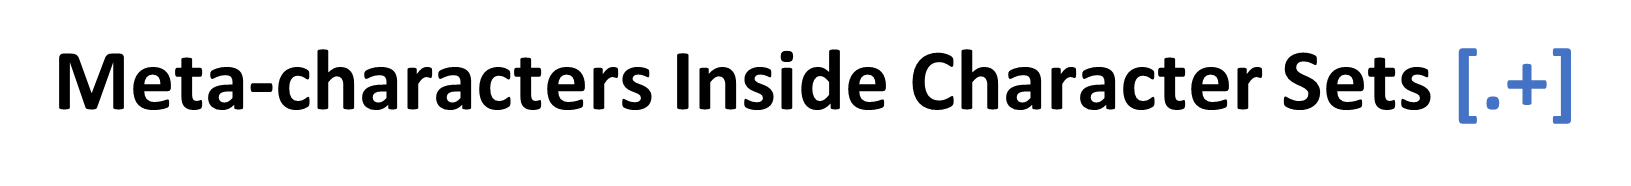

In [35]:
# @title Matching var[0], var(9)

try:
    pattern = r'var[([][0-9][)\]]'
    text = "var(9), var[0]"
    result = re.findall(pattern, text)
    print(f"Result: {result}")
except re.error as e:
    print(f"Regex error: {e}")

Result: ['var(9)', 'var[0]']


## **Task: Read and load raw data**

Last week, we load an `Air Crashes` data in Task 2. The csv file has been already preprocessed in a structured format. However, most of time, we need to work directly on the raw data.

In this task, you will load the raw data file for `Air Crashes` and use regular expressions to convert it into the appropriate structure.

In [ ]:
# Colab please use the following directory in codes below
# If you are using a local environment, you can download the file from your shared drive and use the file path as input directory

# load data in target structure
aircrash = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2025/week3/AirCrashes.csv')
aircrash.head()

Above is the final structure we would like to have.

Now, let's open the raw file.

In [ ]:
# load raw data
df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2025/week3/AirCrashes_raw.csv')
df.shape

In [ ]:
df.head(20)

Carefully think of a solution to complete this task. You will need this experience for Group Assessment 1.